(optional)

In [257]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/HW5')

# **HW5: Brain signal classification**
In *HW 5*, you need to finish:

1.  Model Implementation Part: Implement LSTM and EEGNet models to predict the label of each samples.

2.  Model Competition Part: Implementing a model to reach better accuracy performance.

In [259]:
import numpy as np
import os
import math
import csv
import matplotlib.pyplot as plt
# Import the packages you need here


In [260]:
data = np.load('data.npz')
label = np.load('label.npz')

In [261]:
X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']

Y_train = label['Y_train']
Y_val = label['Y_val']

In [262]:
#print(Y_train)

In [263]:
X_train.shape, X_val.shape, X_test.shape

((604, 22, 200), (152, 22, 200), (190, 22, 200))

In [264]:
Y_train.shape, Y_val.shape

((604, 1), (152, 1))

In [265]:
#print(X_train)

## Model Implementation Part

### LSTM

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_74 (Bat  (604, 22, 200)           800       
 chNormalization)                                                
                                                                 
 lstm_20 (LSTM)              (604, 256)                467968    
                                                                 
 dense_20 (Dense)            (604, 6)                  1542      
                                                                 
 activation_56 (Activation)  (604, 6)                  0         
                                                                 
Total params: 470,310
Trainable params: 469,910
Non-trainable params: 400
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


19/19 [==============================] - 3s 66ms/step - loss: 1.6882 - accuracy: 0.4089 - val_loss: 1.5907 - val_accuracy: 0.5461
Epoch 2/100
19/19 [==============================] - 1s 53ms/step - loss: 1.4930 - accuracy: 0.6109 - val_loss: 1.2354 - val_accuracy: 0.6776
Epoch 3/100
19/19 [==============================] - 1s 54ms/step - loss: 0.8135 - accuracy: 0.7467 - val_loss: 1.8134 - val_accuracy: 0.6513
Epoch 4/100
19/19 [==============================] - 1s 50ms/step - loss: 0.8385 - accuracy: 0.7815 - val_loss: 1.7207 - val_accuracy: 0.6118
Epoch 5/100
19/19 [==============================] - 1s 51ms/step - loss: 0.4985 - accuracy: 0.8361 - val_loss: 1.0435 - val_accuracy: 0.7303
Epoch 6/100
19/19 [==============================] - 1s 53ms/step - loss: 0.4532 - accuracy: 0.8394 - val_loss: 0.5513 - val_accuracy: 0.8224
Epoch 7/100
19/19 [==============================] - 1s 53ms/step - loss: 0.2640 - accuracy: 0.9189 - val_loss: 0.8547 - val_accuracy: 0.7763
Epoch 8/100
19/19 

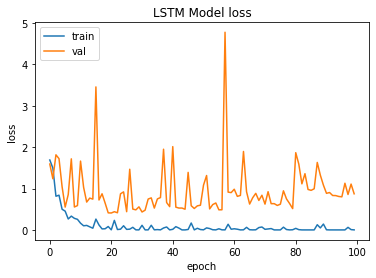

In [266]:
# Build your model here:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Embedding, LSTM, Dense,TimeDistributed, RepeatVector, Bidirectional, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import BatchNormalization


model = Sequential()

model.add(BatchNormalization())
model.add(LSTM(256, activation='relu', input_shape=(22,200)))
model.add(Dense(6))
model.add(Activation('softmax'))
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='rmsprop',
    metrics=["accuracy"],
)
#model.compile(loss='categorical_crossentropy',
#              optimizer='rmsprop',
#              metrics=['accuracy'])
model.build(X_train.shape)
model.summary()
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [267]:
pred = model.predict(X_test)
#print(pred)
#output = output.reshape(-1,1)

#print(output.reshape(-1))
#print(pred.shape)
output = (np.argmax(pred, axis=1)).reshape(-1,1)
#print(output)
print(output.flatten())
#print(output.shape)
assert(output.shape == (190, 1))
np.savetxt('lstm_output.csv', output, delimiter=",")

6/6 [==============================] - 0s 6ms/step
[1 3 4 2 5 1 1 0 5 1 2 2 0 5 5 3 5 5 3 5 1 1 5 1 4 3 2 1 0 5 5 3 0 0 2 3 5
 5 2 2 4 0 4 4 1 2 3 1 4 2 2 4 4 3 4 1 5 2 3 1 4 5 1 2 4 3 1 2 0 4 5 4 3 4
 2 3 3 4 3 2 1 3 2 4 1 3 4 1 1 4 2 5 5 2 4 1 0 5 2 5 4 4 3 2 3 4 1 2 0 0 1
 0 2 4 4 4 1 4 1 1 5 5 3 1 3 0 0 1 3 1 0 5 2 2 4 2 2 0 3 3 5 0 2 5 4 1 3 3
 0 1 5 3 1 2 1 0 2 0 2 3 1 1 4 5 0 5 0 5 4 1 2 1 5 2 4 4 1 3 0 4 2 4 4 2 4
 0 1 1 0 1]


### EEGNet

In [268]:
# Build your model here:
from EEGModels import EEGNet


In [269]:
model1 = EEGNet(nb_classes = 6, Chans = X_train.shape[1], Samples = X_train.shape[2])

In [270]:
model1.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', 
              metrics = ['accuracy'])

In [271]:
model1.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 22, 200, 1)]      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 200, 8)        512       
                                                                 
 batch_normalization_75 (Bat  (None, 22, 200, 8)       32        
 chNormalization)                                                
                                                                 
 depthwise_conv2d_18 (Depthw  (None, 1, 200, 16)       352       
 iseConv2D)                                                      
                                                                 
 batch_normalization_76 (Bat  (None, 1, 200, 16)       64        
 chNormalization)                                                
                                                          

Epoch 1/100
19/19 [==============================] - 1s 17ms/step - loss: 1.6979 - accuracy: 0.3079 - val_loss: 1.6976 - val_accuracy: 0.6118
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 1.4237 - accuracy: 0.5877 - val_loss: 1.5539 - val_accuracy: 0.7171
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 1.2005 - accuracy: 0.6573 - val_loss: 1.4009 - val_accuracy: 0.7632
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 1.0480 - accuracy: 0.7169 - val_loss: 1.2940 - val_accuracy: 0.7500
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.9677 - accuracy: 0.7500 - val_loss: 1.2155 - val_accuracy: 0.7632
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.9028 - accuracy: 0.7848 - val_loss: 1.1295 - val_accuracy: 0.8026
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.8608 - accuracy: 0.8146 - val_loss: 1.0942 - val_accuracy: 0.8487
Epoch 8/100

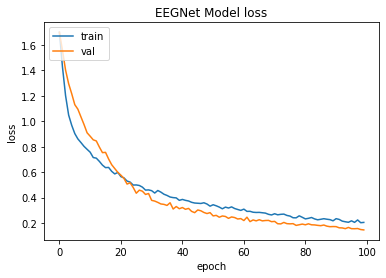

In [272]:
history1 = model1.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('EEGNet Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [273]:
pred1 = model1.predict(X_test)
#print(pred)
#print(pred.shape)


6/6 [==============================] - 0s 3ms/step


In [274]:
output = (np.argmax(pred1, axis=1)).reshape(-1,1)
#print(output.shape)
print(output.flatten())
assert(output.shape == (190, 1))
np.savetxt('eegnet_output.csv', output, delimiter=",")

[0 3 4 2 5 1 0 0 5 1 2 0 0 5 5 3 5 5 3 5 1 1 5 5 4 3 2 1 0 2 5 3 0 0 2 0 5
 5 2 2 4 3 4 4 2 0 3 0 4 2 2 4 4 3 4 3 5 2 0 1 3 5 1 2 4 3 1 2 0 4 5 4 0 3
 2 3 3 4 3 2 1 4 0 1 1 3 4 1 1 4 2 5 5 2 4 1 0 5 2 5 3 4 3 2 4 4 1 2 0 0 1
 0 2 4 3 3 1 4 1 1 5 5 3 1 3 0 0 1 3 1 0 5 0 2 3 2 2 0 3 3 5 0 2 5 4 0 3 3
 0 1 5 3 1 2 1 0 2 0 2 3 1 1 3 5 0 5 5 5 4 1 2 1 5 2 4 4 1 4 0 4 2 3 4 2 4
 0 0 1 0 1]


## Model Competition Part

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 22, 200, 1)]      0         
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 200, 8)        512       
                                                                 
 batch_normalization_78 (Bat  (None, 22, 200, 8)       32        
 chNormalization)                                                
                                                                 
 depthwise_conv2d_19 (Depthw  (None, 1, 200, 16)       352       
 iseConv2D)                                                      
                                                                 
 batch_normalization_79 (Bat  (None, 1, 200, 16)       64        
 chNormalization)                                                
                                                          

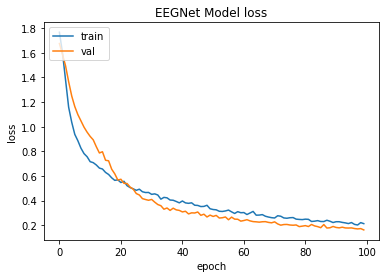

6/6 [==============================] - 0s 3ms/step


In [275]:
# Build your model here:
from EEGModels import EEGNet

model2 = EEGNet(nb_classes = 6, Chans = X_train.shape[1], Samples = X_train.shape[2])

model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', 
              metrics = ['accuracy'])

model2.summary()

history2 = model2.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('EEGNet Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

pred2 = model2.predict(X_test)


In [276]:
output = (np.argmax(pred2, axis=1)).reshape(-1,1)
print(output.flatten())
assert(output.shape == (190, 1))
np.savetxt('competition_output.csv', output, delimiter=",")

[0 3 4 2 5 1 0 0 5 1 2 0 0 5 5 3 5 5 3 5 1 1 5 5 4 3 2 1 0 2 5 3 0 0 2 0 5
 5 2 2 4 0 4 4 2 0 3 0 4 2 2 4 4 3 4 0 5 2 0 1 3 5 1 2 4 3 1 2 0 4 5 4 0 3
 2 3 3 4 3 2 1 4 0 1 1 3 4 1 1 4 2 5 5 2 4 1 0 5 2 5 3 4 3 2 4 4 1 2 0 0 1
 0 2 4 3 4 1 4 1 1 5 5 3 1 3 0 0 1 3 1 0 5 0 2 3 2 2 0 3 3 5 0 2 5 4 0 3 3
 0 1 5 3 1 2 1 0 2 0 2 3 1 1 3 5 0 5 5 5 4 1 2 1 5 2 4 4 1 4 0 4 2 3 4 2 4
 0 0 1 0 1]
